In [358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [359]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


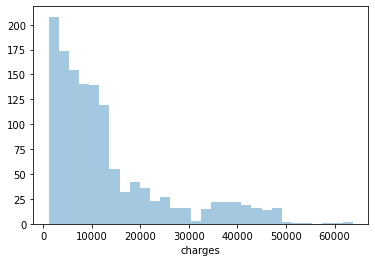

In [361]:
sns.distplot(df['charges'],kde=False)

In [362]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [311]:
df['charges'].median()

9382.033

In [312]:
features = ['age','sex','bmi','children','smoker','region']

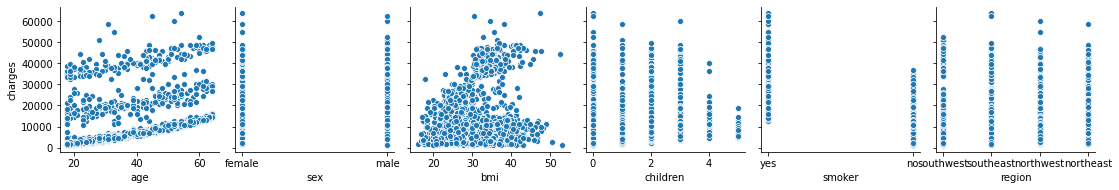

In [97]:
sns.pairplot(df,y_vars='charges',x_vars=features)

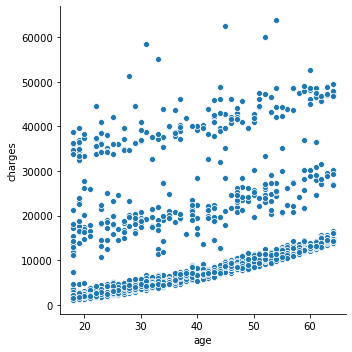

In [98]:
sns.relplot(data=df,y='charges',x='age')

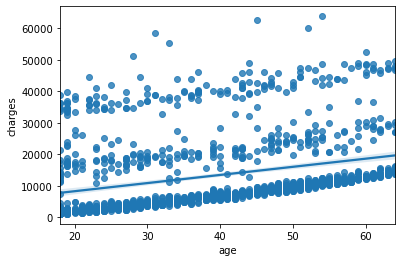

In [99]:
sns.regplot(data=df,y='charges',x='age')

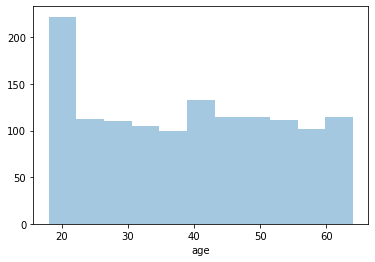

In [100]:
sns.distplot(df['age'],kde = False)

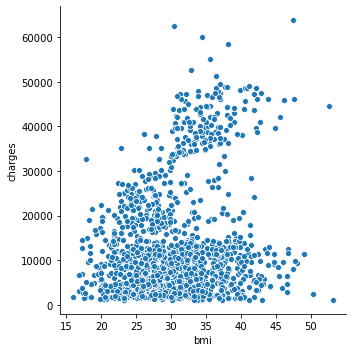

In [101]:
sns.relplot(data=df,y='charges',x='bmi')

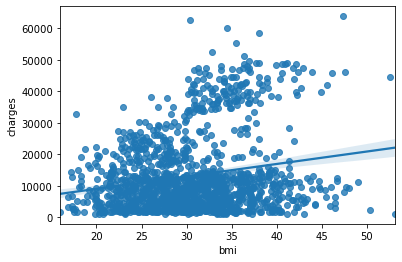

In [102]:
sns.regplot(data=df,y='charges',x='bmi',)

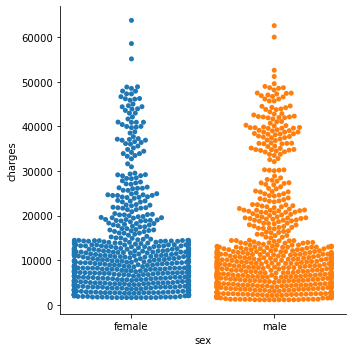

In [103]:
sns.catplot(data=df,y='charges',x='sex',kind='swarm')

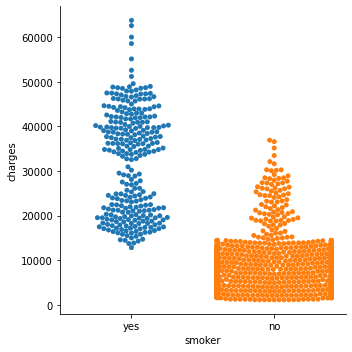

In [104]:
sns.catplot(data=df,y='charges',x='smoker',kind='swarm',)

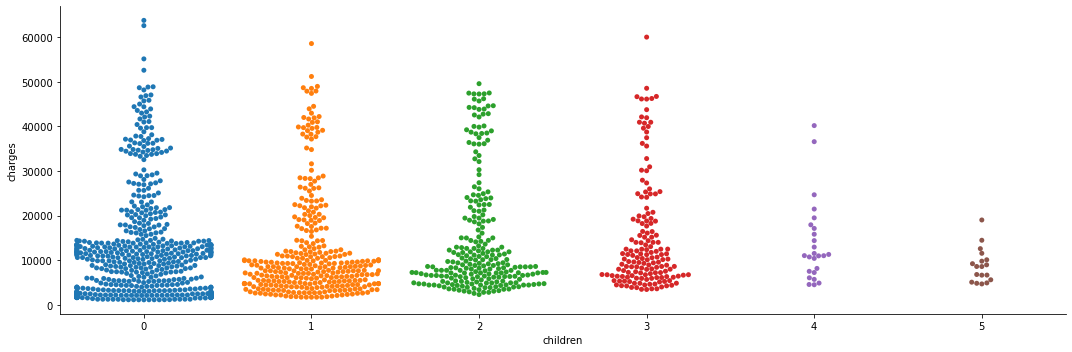

In [105]:
sns.catplot(data=df,y='charges',x='children',kind='swarm',aspect=3)

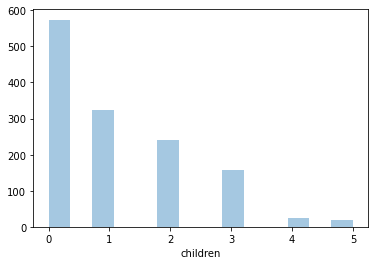

In [106]:
sns.distplot(df['children'],kde=False)

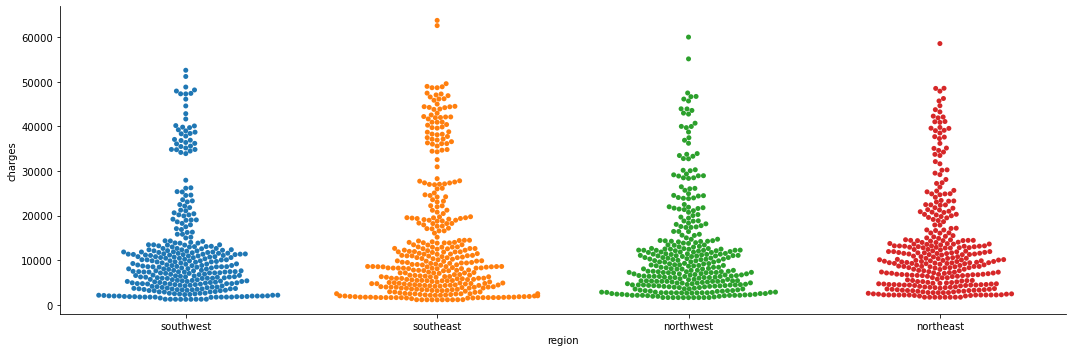

In [107]:
sns.catplot(data=df,y='charges',x='region',kind='swarm',aspect=3)

In [363]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


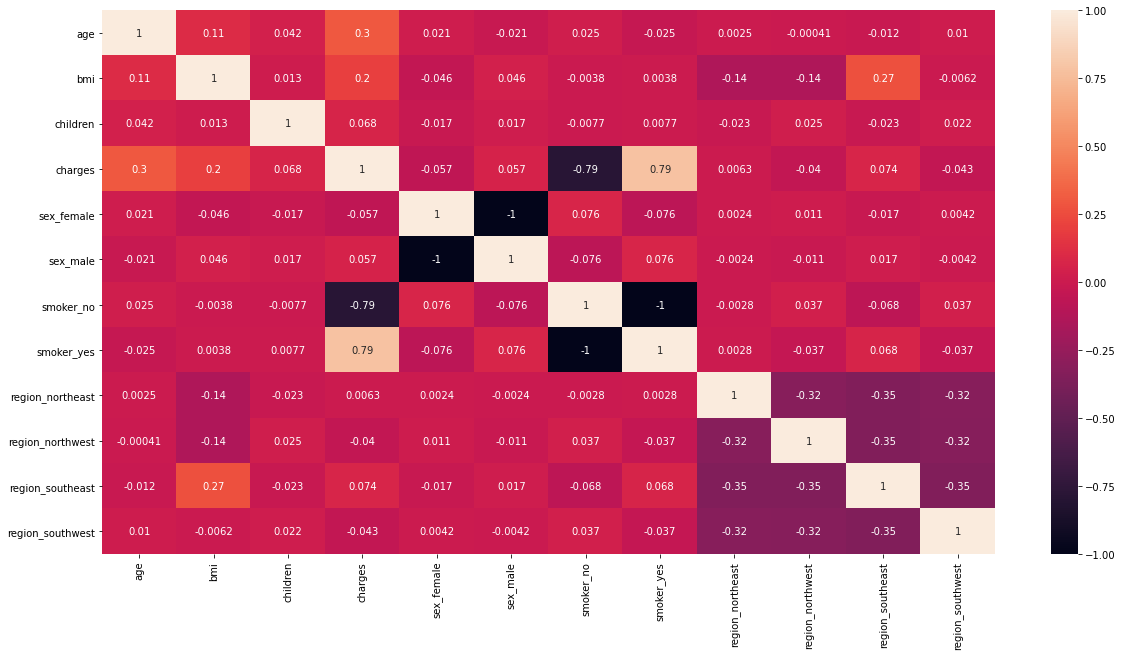

In [364]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)


## KNN

at first lets try to make simple knn model

In [377]:
target=df['charges']
data=df.drop(['charges'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0)

In [378]:
knn_reg = KNeighborsRegressor()
knn_reg = knn_reg.fit(X_train,y_train)
knn_reg

KNeighborsRegressor()

In [379]:
y_pred = knn_reg.predict(X_test)

In [380]:
metrics.r2_score(y_test,y_pred)

0.359784362159977

the result is very bad, lets try to improve it by finding the best k and weight.

In [381]:
k_range = list(range(3,51))
weghit_op = ['uniform','distance']
d= {'n_neighbors' :k_range,'weights': weghit_op}

In [382]:
grid = GridSearchCV(knn_reg,d,cv=10,scoring='r2')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [383]:
grid.best_score_

0.3026425756515969

In [384]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

the result is stil awful to improve it we will scale the data

In [385]:
fitFetuers  = ['age','bmi']
ss = StandardScaler()
df[fitFetuers] = ss.fit_transform(df[fitFetuers])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,1,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,3,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,0,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,0,3866.85520,0,1,1,0,0,1,0,0


In [386]:
target=df['charges']
data=df.drop(['charges'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0)

In [387]:
knn_reg = KNeighborsRegressor()
knn_reg = knn_reg.fit(X_train,y_train)
knn_reg

KNeighborsRegressor()

In [388]:
y_pred = knn_reg.predict(X_test)

In [389]:
metrics.r2_score(y_test,y_pred)

0.7906030864365592

now the r2 is much better, lets improve it even more by finding the best k and weight again.

In [224]:
k_range = list(range(3,51))
weghit_op = ['uniform','distance']
d= {'n_neighbors' :k_range,'weights': weghit_op}

In [225]:
grid = GridSearchCV(knn_reg,d,cv=10,scoring='r2')
grid.fit(data,target)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [226]:
grid.best_score_

0.7637109989542903

In [227]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

now that we found the best parameters lets try to change the weight of each feature and see how it effects the r2.

In [236]:
w = np.ones(11)
max_ws = []
for i in range(len(w)):
    w = np.ones(11)
    print()
    print('current feature is:',i)
    print()
    w_max = 1
    r2_max = 0
    for k in range(1,11):        
        w[i] = k
        knn_reg = KNeighborsRegressor(n_neighbors=6,weights='distance',metric='wminkowski',p=2,metric_params={'w':w})
        knn_reg = knn_reg.fit(X_train,y_train)
        m = cross_val_score(knn_reg,data,target,cv=10,scoring='r2').mean()
        print ("cross score is:",m)
        if m>r2_max:
            w_max = k
            r2_max = m
    max_ws.append(w_max)


current feature is: 0

cross score is: 0.7636736428252252
cross score is: 0.7310681928717017
cross score is: 0.6995777545030724
cross score is: 0.6884410561493187
cross score is: 0.678049081433986
cross score is: 0.660074629571648
cross score is: 0.6440469471071931
cross score is: 0.6252421639055733
cross score is: 0.6092454962572846
cross score is: 0.591006553741664

current feature is: 1

cross score is: 0.7636736428252252
cross score is: 0.7240989945074298
cross score is: 0.6884337085160885
cross score is: 0.6555922568950481
cross score is: 0.6382864534454779
cross score is: 0.6092092653355458
cross score is: 0.5870109898700024
cross score is: 0.5734270309476146
cross score is: 0.5565743750816889
cross score is: 0.5412871545142746

current feature is: 2

cross score is: 0.7636736428252252
cross score is: 0.719321989917381
cross score is: 0.7184373594731277
cross score is: 0.7184215357965169
cross score is: 0.7184215357965169
cross score is: 0.7184215357965169
cross score is: 0.7184

In [237]:
max_ws

[1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1]

the 'max_ws' list represent the best weight for each feature.

In [238]:
knn_reg = KNeighborsRegressor(n_neighbors=6,weights='distance',metric='wminkowski',p=2,metric_params={'w':max_ws})
knn_reg = knn_reg.fit(X_train,y_train)
knn_reg

KNeighborsRegressor(metric='wminkowski',
                    metric_params={'w': [1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1]},
                    n_neighbors=6, weights='distance')

In [239]:
y_pred = knn_reg.predict(X_test)

In [240]:
metrics.r2_score(y_test,y_pred)

0.8566172081602142

## Decision Tree

At first we will make a simple regression tree.

In [331]:
dtr = DecisionTreeRegressor(random_state=0)
dtr = dtr.fit(X_train,y_train)
dtr

DecisionTreeRegressor(random_state=0)

In [332]:
y_pred = dtr.predict(X_test)

In [333]:
metrics.r2_score(y_test,y_pred)

0.7217086705438104

Now to improve it we will use cost complexity pruning to find the tree with the lowest score.

the equation for tree score is:
$$Tree Score=SSR+\alpha T$$
- T - Number of leafs of the tree
- SSR - sum of squares rsiduals
- $\alpha$ - the tuning parameter we want to find


In [334]:
path = dtr.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
alphas

array([0.00000000e+00, 1.54107423e-06, 8.69252293e-06, 8.69252478e-06,
       8.69253221e-06, 2.78352948e-05, 4.66169722e-05, 7.02144020e-05,
       7.82326414e-05, 8.10018004e-05, 8.66844455e-05, 1.04888174e-04,
       1.04888180e-04, 1.39080367e-04, 1.39080378e-04, 1.39080379e-04,
       1.54105684e-04, 1.86467872e-04, 2.17313142e-04, 2.50518047e-04,
       3.24007224e-04, 3.35276197e-04, 4.25933658e-04, 4.25933661e-04,
       5.71057858e-04, 5.71057871e-04, 6.16422732e-04, 6.16422753e-04,
       6.29264872e-04, 7.04094416e-04, 7.80160021e-04, 1.05179537e-03,
       1.16542423e-03, 1.25172342e-03, 1.62774128e-03, 1.67821088e-03,
       1.69837305e-03, 1.70373462e-03, 1.70373464e-03, 1.70373464e-03,
       1.81094243e-03, 1.85168760e-03, 1.94841925e-03, 1.95581785e-03,
       2.28423148e-03, 2.28875835e-03, 2.51213934e-03, 3.12064008e-03,
       3.64945788e-03, 3.66998848e-03, 3.81421196e-03, 4.00828881e-03,
       4.20718151e-03, 4.20718155e-03, 4.40710951e-03, 4.59834503e-03,
      

In [335]:
d = {'ccp_alpha':alphas}

In [336]:
grid = GridSearchCV(dtr,d,cv=10,scoring='r2')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.54107423e-06, 8.69252293e-06, 8.69252478e-06,
       8.69253221e-06, 2.78352948e-05, 4.66169722e-05, 7.02144020e-05,
       7.82326414e-05, 8.10018004e-05, 8.66844455e-05, 1.04888174e-04,
       1.04888180e-04, 1.39080367e-04, 1.39080378e-04, 1.39080379e-04,
       1.54105684e-...
       1.74669258e+05, 1.77528990e+05, 1.78004492e+05, 1.90347931e+05,
       1.90412021e+05, 2.28306423e+05, 2.33804976e+05, 2.41926096e+05,
       2.41947356e+05, 2.42986761e+05, 2.46729857e+05, 2.78649818e+05,
       2.82384389e+05, 3.32064077e+05, 3.62988617e+05, 4.52236392e+05,
       8.86251731e+05, 9.60183669e+05, 1.02864497e+06, 1.31199073e+06,
       9.68459849e+06, 2.02531235e+07, 8.62788203e+07])},
             scoring='r2')

In [337]:
grid.best_score_

0.8442163332799002

In [338]:
grid.best_params_

{'ccp_alpha': 332064.07716383436}

In [339]:
res = pd.DataFrame(grid.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011469,0.005389,0.002187,0.001931,0,{'ccp_alpha': 0.0},0.754608,0.662267,0.649563,0.589553,0.788671,0.69997,0.724417,0.691651,0.697304,0.719129,0.697713,0.052913,539
1,0.009373,0.007653,0.000000,0.000000,1.54107e-06,{'ccp_alpha': 1.5410742279539556e-06},0.754608,0.662267,0.649563,0.589553,0.788671,0.69997,0.724417,0.691651,0.697304,0.719129,0.697713,0.052913,539
2,0.010931,0.007156,0.001566,0.004699,8.69252e-06,{'ccp_alpha': 8.692522927866144e-06},0.754608,0.662267,0.649563,0.589553,0.788671,0.69997,0.724417,0.691651,0.697304,0.719129,0.697713,0.052913,541
3,0.010939,0.007161,0.001558,0.004675,8.69252e-06,{'ccp_alpha': 8.692524784940071e-06},0.754608,0.662267,0.649563,0.589553,0.788671,0.69997,0.724417,0.691651,0.697304,0.719129,0.697713,0.052913,541
4,0.007816,0.007816,0.001562,0.004685,8.69253e-06,{'ccp_alpha': 8.69253221323578e-06},0.754608,0.662267,0.649563,0.589553,0.788671,0.69997,0.724417,0.691651,0.697304,0.719129,0.697713,0.052913,541


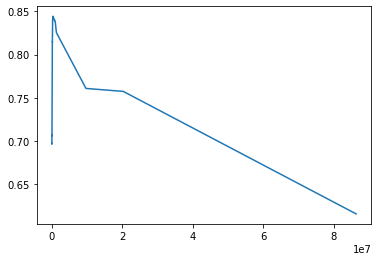

In [340]:
plt.plot(alphas,res['mean_test_score'])

In [344]:
dtr = DecisionTreeRegressor(random_state = 0, ccp_alpha = 332064.07716383436)
dtr = dtr.fit(X_train,y_train)
dtr

DecisionTreeRegressor(ccp_alpha=332064.07716383436, random_state=0)

In [345]:
y_pred = dtr.predict(X_test)

In [346]:
metrics.r2_score(y_test,y_pred)

0.8820138096747815